Pradedame importuodami mums reikalingas bibliotekas. Šiuo atveju mums rūpi "migen" biblioteka ir jos posistemės bei python standartine "os" biblioteka, leidžianti naudotis komandos eilutėmis per python programas.

In [1]:
import migen as mg
from migen import *
from migen.fhdl.verilog import convert
import os

Pradedame nuo testų.
check_case pavadiname funkciją priimančia keturis argumentus: x,y,z,out. Tai bus mūsų trys įvestys (x,y,z) ir viena išvestis (out)

In [2]:
def check_case(a,b,c):
    yield dut.a.eq(a)   # dut modulio įvestį a prilyginame a funkcijos įvesčiai.
    yield dut.b.eq(b)   # dut modulio įvestį b prilyginame b funkcijos įvesčiai.
    yield               # palaukiame vieną clock signalą
    assert (yield dut.c) == c    # patikriname ar dut modulio išvestis c lygi funkcijos įvesčiai c.

def or_gate_testbench():
    yield from check_case(0, 0, 0)    # kviečiame check_case funkciją su įvairomis įvestimis.
    yield from check_case(0, 1, 1)    #  yield from reiškia, kad kviečiama funkcija naudojama signalam tikrinti.
    yield from check_case(1, 0, 1)
    yield from check_case(1, 1, 1)

Toliau aprašome savo skaitmeninės logikos mudulį. Jis aprašomas kaip klasė kurios objektus vėliau generuosime.

In [3]:
class OR_Gate(Module):          # Kuriame klasę DUT kuri paveldi 'Module' migen klasę.
    def __init__(self):     # klasė turi pirminę funkciją kuri visados paleidžiame instancijuojant šios klasės objektus.
        self.a = Signal()   # sukuriamas naujas signalas a
        self.b = Signal()   # sukuriamas naujas signalas b
        self.c = Signal()   # sukuriamas naujas signalas c

        ###

        self.comb += self.c.eq(self.a | self.b) 
        # į modulio kombinacinės logikos grandinę pridedame išraišką:
        # c <= a | b
        # pabandyk sync apart comb :)

Instancijuojame DUT klasės objektą 'dut' ir paleidžiame simuliatorių, paduodaji jam dut modulį bei testavimo metodą.
Tuo pačiu sugeneruojame .vcd file'ą pažiūrėti signalų laiko grafą "dut.vcd"

In [4]:
dut = OR_Gate()
with mg.Simulator(dut, [or_gate_testbench()], vcd_name="dut.vcd") as sim:
    sim.run()

Kviečiame GTKWave įrankį. Ši eilutė lygi cmd atidarymui šioje direktorijoje ir 'gtkwave dut.vcd' įvedimui.
Pabaigus žiūrėti, išjunkite GTKWave įrankį, kad galėtumėte tęsti programą.

In [5]:
os.system('cmd /k gtkwave dut.vcd')

0

Nusitempe signalus ant laiko diagramos (arba visus pažymėję ir paspaude "Append" mygtuką turėtumėte matyti šį vaizdą:
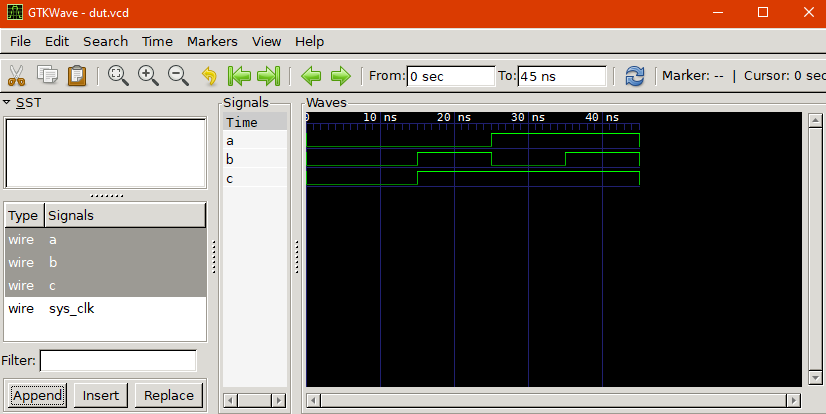

Toliau generuojame Verilog file'ą. Per naują instancijuojame dut objektą, naudojame migen convert funkciją, aprašome kokios yra modulio aukščiausio lygio "top module" įvestis ir išvestys (biblioteka pati susigaudys, kad yra įvestis, kad yra išvestis).

Galiausiai atspaudinsime sugeneruotą verilog file'ą ir išsaugosime esamoje direktorijoje.

In [7]:
dut = OR_Gate()
converted = convert(dut,ios={dut.a,dut.b,dut.c},display_run=True)
print(converted)
converted.write("dut.v")

/* Machine-generated using Migen */
module top(
	input a,
	input b,
	output c
);


// synthesis translate_off
reg dummy_s;
initial dummy_s <= 1'd0;
// synthesis translate_on

assign c = (a | b);

endmodule


